# Segmenting and clustring appartement price in Paris.

# 1- Business understanding : 
  
  Currently  to find a good appartement with high quality,low cost and good location in Paris  is very difficult. One of my friend want to buy an appartement but he doesn't have time to look for it and he doesn't know which tools can be used to find it. To help him find a good appartement in Paris city, i come up with a solution which is based on scraping a web page and analyse the data then select the right appartement with the right location.

The problem can be resumed in the following points 
- the objectif :  buy an appartement 
- Constraints :  high quality, low cost , location, low crimes. 
- tools : use data science to select the right used pc 
  
## 2- Problem solution : 

In order to select the right apprtement, we must follow the following steps :

- For this problem we will use the set web "PAP" which is a specialised announcement set web. 
- Scrap the set web in order to get data about cost, location 
- use the set web foursquare to get the location of each appartement 


    

In [426]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import numpy as np # library to handle data in a vectorized manner
import requests
import pandas as pd # library for data analsysis
!pip install requests_cache
import requests_cache
import json # library to handle JSON files
!pip install shadow_useragent
import shadow_useragent
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans
!pip install folium
import folium # map rendering library
requests_cache.install_cache("bases_scraping", expire_after=10e5)
print('Libraries imported.')



Libraries imported.


# 3- Collect of data:
In order to find a solution to our problem, i will use "PAP.FR" which is a famous siteweb of imovable. in order to facilate the collecteting of data, i will directelty do a research of all annoucement in the paris city.

In [368]:
url = 'https://www.pap.fr/annonce/vente-appartements-paris-75-g439-'
headers = {'User-Agent': '*',
'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
'Accept-Language': 'en-US,en;q=0.5',
'Accept-Encoding': 'gzip, deflate',
'Connection': 'keep-alive',
'Upgrade-Insecure-Requests': '1'}
s = requests.Session()
s.headers.update(headers)
s.get('https://www.pap.fr/')

r = s.get(url)

def get_pages(token, nb):
    pages = []
    for i in range(1,nb+1):
        j = token + str(i)
        pages.append(j)
    return pages
pages = get_pages(url,250)

response=[]
for i in pages:
    headers = {'User-Agent': '*',
               'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
               'Accept-Language': 'en-US,en;q=0.5',
               'Accept-Encoding': 'gzip, deflate',
               'Connection': 'keep-alive',
               'Upgrade-Insecure-Requests': '1'}
    s = requests.Session()
    s.headers.update(headers)
    s.get('https://www.pap.fr/')
    response.append(s.get(i))

soup=[]
for i in range(len(response)):
    soup.append(BeautifulSoup(response[i].text, 'html.parser'))

# 4- Data analysis : 
After collecting data from "PAP.FR", the following code will be about data analysis, i will do a lot of analysis in order to get the final data.



In [374]:
data=[]
for i in range(len(soup)):
    data.append(soup[i].find_all("div", "item-img img-liquid"))



In [376]:
x=str(data)
y=x.split('\n')
y[0:3]

['[[<div class="item-img img-liquid">',
 '<img alt="Vente appartement 3\xa0pièces 74\xa0m² Paris 16E - 1.010.000\xa0€" src="https://static.pap.fr/photos/D17/D17A0066.thumb.jpg"/>',
 '</div>, <div class="item-img img-liquid">']

In [377]:
z=y[1:len(y):2]
liste=[]
for i in range(len(z)):
    liste.append(z[i].split('"'))
doni=[]    
for j in range(len(liste)):
    doni.append(liste[j][1])

doni[1]


'Vente appartement 7\xa0pièces 235\xa0m² Paris 15E - 2.250.000\xa0€'

In [378]:
df3=[]
for q in range(len(doni)):
        df3.append(doni[q].split(" ") )

# 5- Arrange the data in a dataframe
The next step will be about putting the data in a  dataframe.
The data frame contains five columns as follow : 
- Number of room
- Postal code
- Price
- City: parsi in our case 
- The price of each appartement.

In [459]:

df_f = pd.DataFrame()
df_f1=[]
df_f2=[]
df_f3=[]
df_f4=[]
df_f5=[]
for i in range(len(df3)):
    if len(df3[i]) == 9:        
        for j in range(9):
            if j==2:
                df_f1.append(df3[i][j])    
            elif j==3: 
                df_f2.append(df3[i][j])
            elif j==4 :
                df_f3.append(df3[i][j])
            elif j==6:
                df_f4.append(df3[i][j])
            elif j ==8 :
                df_f5.append(df3[i][j])
    elif len(df3[i])==8:
        for j in range(8):
            if j==2:
                df_f1.append(df3[i][j])    
            elif j==3: 
                df_f2.append(df3[i][j])
            elif j==4 :
                df_f3.append(df3[i][j])
            elif j==5:
                df_f4.append(df3[i][j])
            elif j == 7 :
                df_f5.append( df3[i][j])
    elif len(df3[i])==7 : 
            if j==1:
                df_f1.append(df3[i][j])    
            elif j==2: 
                df_f2.append(df3[i][j])
            elif j==3 :
                df_f3.append(df3[i][j])
            elif j==4:
                df_f4.append(df3[i][j])
            elif j == 6 :
                df_f5.append( df3[i][j])
        

minp=min(len(df_f1),len(df_f2),len(df_f3),len(df_f4),len(df_f5))

df_f['number_of_room']=df_f1[0:minp]
df_f['surface']=df_f2[0:minp]
df_f['ville']=df_f3[0:minp]
df_f['code_postale']=df_f4[0:minp]
df_f['prix']= df_f5[0:minp]
df_f.head()

,number_of_room,surface,ville,code_postale,prix
0,3 pièces,74 m²,Paris,16E,1.010.000 €
1,7 pièces,235 m²,Paris,15E,2.250.000 €
2,2 pièces,54 m²,Paris,(75018),690.000 €
3,2 pièces,37 m²,Paris,(75018),319.000 €
4,3 pièces,46 m²,Paris,(75011),530.000 €


The folling code will be focused in wrangling the dataframe "df_f"

In [381]:
df_f.dtypes
df_f.replace("16E", '(75016)', inplace = True)
df_f.replace("14E", '(75014)', inplace = True)
df_f.replace("2E", '(75002)', inplace = True)
df_f.replace("15E", '(75015)', inplace = True)
df_f.replace("12E", '(75012)', inplace = True)
df_f.replace("18E", '(75018)', inplace = True)
df_f.replace("6E", '(75006)', inplace = True)
df_f.replace("9E", '(75009)', inplace = True)
missing_data = df_f.isnull()
df_f.head()

,number_of_room,surface,ville,code_postale,prix
0,3 pièces,74 m²,Paris,(75016),1.010.000 €
1,7 pièces,235 m²,Paris,(75015),2.250.000 €
2,2 pièces,54 m²,Paris,(75018),690.000 €
3,2 pièces,37 m²,Paris,(75018),319.000 €
4,3 pièces,46 m²,Paris,(75011),530.000 €


In [382]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

number_of_room
False    766
Name: number_of_room, dtype: int64

surface
False    766
Name: surface, dtype: int64

ville
False    766
Name: ville, dtype: int64

code_postale
False    766
Name: code_postale, dtype: int64

prix
False    766
Name: prix, dtype: int64



In [383]:
prix=np.array(df_f[['prix']])
numbers=[]
reprix=[]
import re
for k in range(len(prix)):
    numbers.append(re.findall('\d+',prix[k][0]))
    
for p in range(len(numbers)):
    if len(numbers[p])==2 :
        reprix.append(numbers[p][0]+numbers[p][1])
    elif len(numbers[p])==3:
         reprix.append(numbers[p][0]+numbers[p][1]+numbers[p][2])
    


In [386]:
codepostal=np.array(df_f[['code_postale']])
code=[]
recode=[]
import re
for k in range(len(codepostal)):
    code.append(re.findall('\d+',codepostal[k][0]))
    
for q in range(len(code)):
    recode.append(code[q][0])
    


In [398]:
data_appart = pd.DataFrame()
X=np.array(df_f[['ville']])
Y=[]
for q in range(len(X)):
    Y.append(X[q][0])
data_appart['city']=Y
data_appart['postal code']=recode
data_appart['price']=reprix
data_appart[['postal code','price']]=data_appart[['postal code','price']].astype('int64')
data_appart.replace("18E", 'Paris', inplace = True)
data_appart.replace("10E", 'Paris', inplace = True)
data_appart.head()

,city,postal code,price
0,Paris,75016,1010000
1,Paris,75015,2250000
2,Paris,75018,690000
3,Paris,75018,319000
4,Paris,75011,530000


# 6- Getting location using foursquare: 
The main objective here is to get the location of each neighberhood by using the postal code and the siteweb "foursquare".

In [389]:
from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML
from pandas.io.json import json_normalize

In [392]:
CLIENT_ID = 'LXPWCV205VQ5HY1MAWJCVG31K3HUXIX1FGOMHUZMY2NPCN2Y' # your Foursquare ID
CLIENT_SECRET = '3AWEBVBK0YCXNVRT1VORCYYGPRCZNO1KMT5WLTOSAYIDQTR4' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 321
location=[]
address = np.array(data_appart[['postal code']])
for item in range(len(address)):
    geolocator = Nominatim(user_agent="foursquare_agent")
    location.append(geolocator.geocode(address[item][0]))
    
 

In [393]:
latitude=[]
longitude=[]
neighberhood=[]
for loc in range(len(location)):
    latitude.append(location[loc][1][0])
    longitude.append(location[loc][1][1])
    neighberhood.append(location[loc][0].split(',')[0])
location[1:5]

[Location(Paris 15e Arrondissement, Paris, Île-de-France, France métropolitaine, 75015, France, (48.841444028792225, 2.2952154245990806, 0.0)),
 Location(Quartier de la Goutte-d'Or, Paris, Île-de-France, France métropolitaine, 75018, France, (48.8875005, 2.3562121, 0.0)),
 Location(Quartier de la Goutte-d'Or, Paris, Île-de-France, France métropolitaine, 75018, France, (48.8875005, 2.3562121, 0.0)),
 Location(Quartier Sainte-Marguerite, Paris, Île-de-France, France métropolitaine, 75011, France, (48.8502983, 2.384783089982797, 0.0))]

After getting the location i will put it in a data frame named "data_appart". it contains six columns:
- The name of city : Paris in our case 
- The postal code of the neighberhood 
- The name of each neighberhood 
- The location information (latitude, longitude)

In [424]:

data_appart['neighberhood']=neighberhood
data_appart['latitude']=latitude
data_appart['longitude']=longitude
data_appart.head()

,Cluster Labels,city,postal code,price,neighberhood,latitude,longitude
0,2,Paris,75016,1010000,Quartier d'Auteuil,48.854928,2.255330
1,1,Paris,75015,2250000,Paris 15e Arrondissement,48.841444,2.295215
2,0,Paris,75018,690000,Quartier de la Goutte-d'Or,48.887501,2.356212
3,3,Paris,75018,319000,Quartier de la Goutte-d'Or,48.887501,2.356212
4,0,Paris,75011,530000,Quartier Sainte-Marguerite,48.850298,2.384783


# 7- K_means for clustering 
In this section i will explorate the collected data in order to determine the righ appartement and right location. to do data i will use the k-means clustring to cluster my data ans the fulium labrary in order to displys the result in a map.

In [211]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
!pip install folium
import folium # map rendering library

     |████████████████████████████████| 102kB 7.3MB/s ta 0:00:011


The folling code is about displaying the map of Paris. In this map i display each neighberhood by  putting a blue point in the map. 

In [408]:
map_ile_de_france = folium.Map(location=[48.8499198,2.6370411],zoom_start=10)

for lat,lng,price,neighbourhood in zip(data_appart['latitude'],data_appart['longitude'],data_appart['price'],data_appart['neighberhood']):
    label = '{}, {}'.format(neighbourhood,price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_ile_de_france)
map_ile_de_france

In the next cell, i will fit the K-means algorithm in order to cluster the price of appartement.

In [420]:
k=5
paris_clustering = data_appart.drop(['postal code','city','neighberhood'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(paris_clustering)
kmeans.labels_
#data_appart.insert(0, 'Cluster Labels', kmeans.labels_)
data_appart.head()

,Cluster Labels,city,postal code,price,neighberhood,latitude,longitude
0,2,Paris,75016,1010000,Quartier d'Auteuil,48.854928,2.255330
1,1,Paris,75015,2250000,Paris 15e Arrondissement,48.841444,2.295215
2,0,Paris,75018,690000,Quartier de la Goutte-d'Or,48.887501,2.356212
3,3,Paris,75018,319000,Quartier de la Goutte-d'Or,48.887501,2.356212
4,0,Paris,75011,530000,Quartier Sainte-Marguerite,48.850298,2.384783


The following graph shows the relation between the price and the number of appartement in paris. 

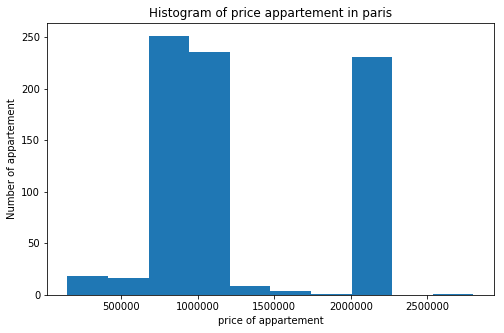

In [452]:
count, bin_edges = np.histogram(data_appart['price'], 15)
data_appart['price'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of price appartement in paris') # add a title to the histogram
plt.ylabel('Number of appartement') # add y-label
plt.xlabel('price of appartement') # add x-label

plt.show()

# 8- Displaying the result in the map: 
In the next cell, i will displaying the result in the map. there is four cluster, the clusters was done by price. In the map i represent each cluster by point with different colors.

In [416]:
# create map
map_clusters = folium.Map(location=[48.8499198,2.6370411],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, price, cluster in zip(data_appart['latitude'], data_appart['longitude'], data_appart['price'], data_appart['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 9- Result Analysis : 
Based in our result we sum up the following answers : 
- The price of an appartement in the center of paris is very expensive. 
- To buy sheap appartement my friend need to be little bit far from the center of paris. 

        